### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.random import seed
from scipy.stats import norm
from scipy.special import ndtr as ndtr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### A) Assemble a dataframe with one row per customer and the following columns:

* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)
Sort the dataframe by customer_id ascending and display the first 10 rows.

### Loading Data

In [2]:
data = pd.read_csv('screening_exercise_orders_v201810.csv')
data.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [3]:
data.info() # data insight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       13471 non-null  int64  
 1   gender            13471 non-null  int64  
 2   date              13471 non-null  object 
 3   value             13471 non-null  float64
 4   predicted_gender  13471 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


In [4]:
#number of unique customers

data['customer_id'].nunique()

8814

### RESULT:
### We should have distinct 8814 rows.

In [5]:
#Created order count column per customer

data['order_count'] = data.groupby(['customer_id'])['customer_id'].transform('count')
data.head()

,customer_id,gender,date,value,predicted_gender,order_count
0,1000,0,2017-01-01 00:11:31,198.5,1,1
1,1001,0,2017-01-01 00:29:56,338.0,1,1
2,1002,1,2017-01-01 01:30:31,733.0,1,3
3,1003,1,2017-01-01 01:34:22,772.0,1,4
4,1004,0,2017-01-01 03:11:54,508.0,1,1


In [6]:
data['date'] = pd.to_datetime(data.loc[:,'date']) # Converted strings to datetime object

by_customer = data.loc[data.groupby('customer_id').date.idxmax(),:] # Created a dataframe by most recent order
by_customer = by_customer.rename(columns={"date": "most_recent_order_date"})
by_customer.drop(['value','predicted_gender'],axis=1).head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
1742,1002,1,2017-02-19 21:35:31,3
4323,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
12953,1005,1,2017-12-16 01:39:27,2
4798,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
12991,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


In [7]:
#Checked
len(by_customer)

8814

### B) Plot the count of orders per week for the store.

In [8]:
data.set_index('date',inplace=True) # Set date column as index

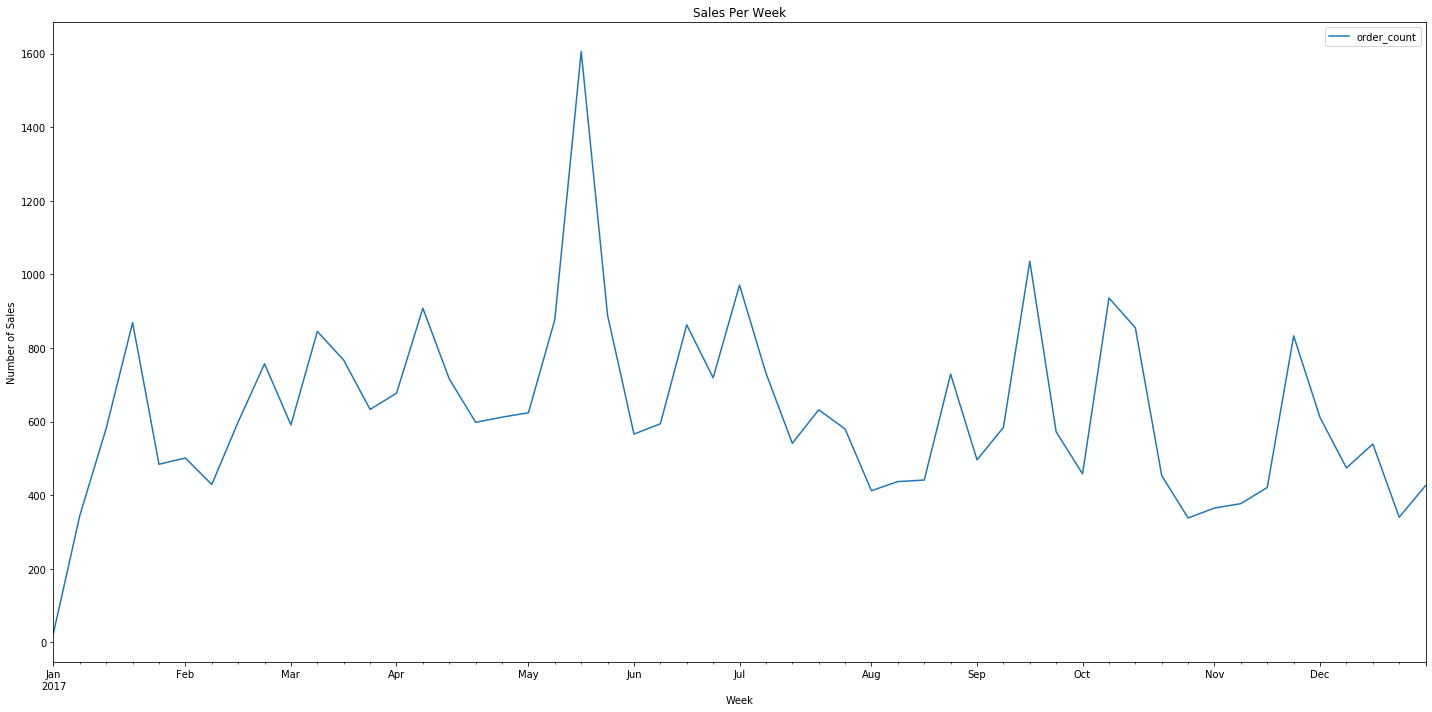

In [9]:
data.resample('W')[['order_count']].sum().plot(figsize=(20,10)) # Resampled weekly

plt.xlabel('Week')
plt.ylabel('Number of Sales')
plt.title('Sales Per Week')
plt.tight_layout()
plt.rc('axes', labelsize=12) 

### C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

In [10]:
print('Mean value of gender 0: {}\nMean value of gender 1: {}'.format(round(data[data['gender']==0]['value'].mean(),2),
                                                                      round(data[data['gender']==1]['value'].mean(),2)))


Mean value of gender 0: 363.89
Mean value of gender 1: 350.71


Let HO and H1 null and alternative hypothesis respectively.HO will assume that there is no significant difference between mean values. We accept alternative(H1)hypothesis, if we reject null hypothesis at the end of statistical test.

Let M0 and M1 be means of genders respectively.

  H0: M0 = M1 (M0 - M1 = 0)
  H1: M0 ≠ M1 (M0 - M1 ≠ 0)

### Examining Gender 0 and 1

In [11]:
len(data[data['gender']==0])

6759

In [12]:
len(data[data['gender']==1])

6712

In [13]:
#significance level = 0.05
z_critical = norm.ppf(0.975)
round(z_critical,2)

1.96

let`s take a sample from both gender type that contains 500 samples from M2 and M3 respectively.(500<(6759/10)),(500<(6712/10)) For the sake of 10% rule being independent, 500 is a plausible value which is less than 10% of number of gender that have 0 and 1.

In [14]:
#Sample Mean of 0

seed(38)
gender_0 = data[data['gender']==0]
value_0 = gender_0['value']
sample_0 = np.random.choice(value_0,500)
sample_mean_0 = np.mean(sample_0)
print('Sample mean of 0 = {}'.format(round(sample_mean_0,2)))

#Sample std of 0

sample_std_0 = np.std(value_0)/(500**0.5)
print('Sample std of 0 = {}'.format(round(sample_std_0,2)))

Sample mean of 0 = 376.13
Sample std of 0 = 17.73


In [15]:
#Sample Mean of 1

seed(38)
gender_1 = data[data['gender']==1]
value_1 = gender_1['value']
sample_1 = np.random.choice(value_1,500)
sample_mean_1 = np.mean(sample_1)
print('Sample mean of 1 = {}'.format(round(sample_mean_1,2)))

#Sample std of 1

sample_std_1 = np.std(value_1)/(500**0.5)
print('Sample std of 1 = {}'.format(round(sample_std_1,2)))

Sample mean of 1 = 334.83
Sample std of 1 = 16.88


I applied z-test assuming std is known and large sample size(n>30). 

In [16]:
z = (sample_mean_1-sample_mean_0)/np.sqrt(np.sum((sample_std_1**2/500**0.5)+(sample_std_0**2/500**0.5)))
round(z,2)

-7.98

In this frequentis statistic,z value is way beyond z_critical value so we have to reject null hyptohesis(M0-M1=0) 
which we accept alternative hypothesis. It indicates that there is a significance difference between mean value of genders with 1 and mean value of genders with 0.

### D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

In [17]:
cm = confusion_matrix(data['gender'],data['predicted_gender'])

cm_norm = confusion_matrix(data['gender'],data['predicted_gender'],normalize='all')

print('Confusion Matrix for gender:\n\n{}\n\nNormalized Confusion Matrix:\n\n{}'.format(cm,cm_norm))

Confusion Matrix for gender:

[[3349 3410]
 [1463 5249]]

Normalized Confusion Matrix:

[[0.24860812 0.25313637]
 [0.10860367 0.38965184]]


Accuracy is important especially for balanced datasets.
We also consider other metrics such as precision, recall and f1-score for model evaluation.

In [18]:
round(accuracy_score(data['gender'],data['predicted_gender']),2)

0.64

In [19]:
print(classification_report(data['gender'],data['predicted_gender']))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58      6759
           1       0.61      0.78      0.68      6712

    accuracy                           0.64     13471
   macro avg       0.65      0.64      0.63     13471
weighted avg       0.65      0.64      0.63     13471



It is crucial that if we want our product to reach the target audience, we have to do a very good gender prediction. Imagine that we are selling women dresses and accept 0 as women. Recall of 0 is very low that we didn't predict correctly fifty percent of women in reality. It means that we lost almost half of our potential customers. Vice versa.(men situation) We need to reach the right customer to make a profit so we should minimize false positives (increase precision) in determining required customer based on gender. Recall for gender 1 is not too bad although it should be higher. Overall balanced data (6759~6712) with %64 accuracy, the model needs to be improved by trying different algorithms in order to catch low variance-low bias (optimum) and finalize by taking consideration of high ROC and AUC. 

### E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.

- Enjoying spend time with time-series by analyzing stock prices based on daily,weekly,monthly etc.
- Having a special interest in data cleaning. (Especially melt)
- Creating a new column in a dataframe motivates me by using lambda function in apply. 
- Removing stopwords and punctuation, counting bag-of words, stemmization-lemmatization evaluating tf-idf by nltk library in NLP.